In [34]:
import pandas as pd
N2= pd.read_csv('co2_annmean_mlo.csv',sep=',', skiprows=43)
print(N2.head(50))
N2_data= N2[['year', 'mean']]
N1 = pd.read_csv('co2_annmean_gl.csv',sep=',', skiprows=37)
print(N1.head(60))
N1_data =N1[['year', 'mean']]
#在尝试后面操作发现读取index出现问题我们跳过前面33行无效信息
gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)
print(gamma.head(30))
gamma_data = gamma[['Year', 'Total']]

    year    mean   unc
0   1959  315.98  0.12
1   1960  316.91  0.12
2   1961  317.64  0.12
3   1962  318.45  0.12
4   1963  318.99  0.12
5   1964  319.62  0.12
6   1965  320.04  0.12
7   1966  321.37  0.12
8   1967  322.18  0.12
9   1968  323.05  0.12
10  1969  324.62  0.12
11  1970  325.68  0.12
12  1971  326.32  0.12
13  1972  327.46  0.12
14  1973  329.68  0.12
15  1974  330.19  0.12
16  1975  331.13  0.12
17  1976  332.03  0.12
18  1977  333.84  0.12
19  1978  335.41  0.12
20  1979  336.84  0.12
21  1980  338.76  0.12
22  1981  340.12  0.12
23  1982  341.48  0.12
24  1983  343.15  0.12
25  1984  344.87  0.12
26  1985  346.35  0.12
27  1986  347.61  0.12
28  1987  349.31  0.12
29  1988  351.69  0.12
30  1989  353.20  0.12
31  1990  354.45  0.12
32  1991  355.70  0.12
33  1992  356.54  0.12
34  1993  357.21  0.12
35  1994  358.96  0.12
36  1995  360.97  0.12
37  1996  362.74  0.12
38  1997  363.88  0.12
39  1998  366.84  0.12
40  1999  368.54  0.12
41  2000  369.71  0.12
42  2001  3

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\胡天龙\AppData\Local\Temp\ipykernel_14008\1218715712.py:9: SyntaxWarning: invalid escape sequence '\s'
  gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)


In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Time: 1987.0, N1: 348.68, N2: 349.31, gamma: 12.194249999999998, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1988.0, N1: 351.5697388273299, N2: 358.8392240892956, gamma: 12.64368, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1989.0, N1: 355.387510776823, N2: 367.80356961420256, gamma: 12.92058, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1990.0, N1: 359.7571667466885, N2: 376.3630066385915, gamma: 12.937619999999999, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1991.0, N1: 364.5134337747855, N2: 384.61678005466484, gamma: 13.08246, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1992.0, N1: 369.49925729316413, N2: 392.6452598454482, gamma: 12.94614, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1993.0, N1: 374.59394651328597, N2: 400.48818667797354, gamma: 12.9291, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1994.0, N1: 379.9344225250963, N2: 408.1875945451488, gamma: 13.15062, k12: 0.14189189189189189, 

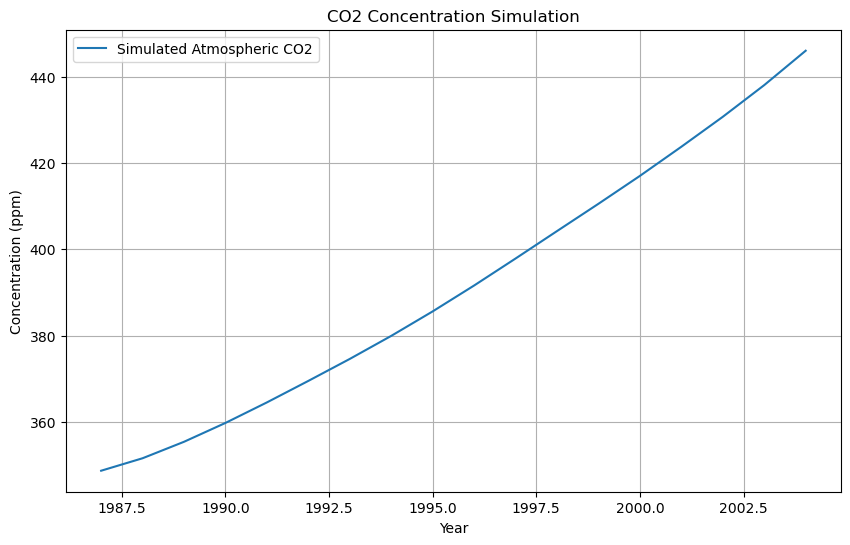

In [38]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 设置年份为索引
N1_data.set_index('year', inplace=True)
N2_data.set_index('year', inplace=True)
gamma_data.set_index('Year', inplace=True)

# 获取初始条件
N1_0 = N1_data.loc[1987, 'mean']
N2_0 = N2_data.loc[1987, 'mean'] 

# 定义微分方程模型
def model(Y, t, k12, k21, gamma_func):
    N1, N2 = Y
    gamma_t = gamma_func(t)
    dN1dt = -k12 * N1 + k21 * N2 + gamma_t
    dN2dt = k12 * N1 - k21 * N2
    return [dN1dt, dN2dt]

# 参数
k12 = 105 / 740
k21 = 102 / 900

# 时间序列
t = np.linspace(1987, 2004, 18)

# 定义一个函数来获取gamma值
def gamma_func(t):
    idx = np.argmin(np.abs(gamma_data.index - t))
    return gamma_data.iloc[idx]['Total'] / 1000*2.13

# 求解微分方程
solution = odeint(model, [N1_0, N2_0], t, args=(k12, k21, gamma_func))

# 输出求解过程中的数值
for i, (time, state) in enumerate(zip(t, solution)):
    gamma_t = gamma_func(time)
    print(f"Time: {time}, N1: {state[0]}, N2: {state[1]}, gamma: {gamma_t}, k12: {k12}, k21: {k21}")

# 提取结果
N1, N2 = solution.T

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, N1, label='Simulated Atmospheric CO2')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.title('CO2 Concentration Simulation')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
import pandas as pd
N2= pd.read_csv('co2_annmean_mlo.csv',sep=',', skiprows=43)
print(N2.head(50))
N2_data= N2[['year', 'mean']]
N1 = pd.read_csv('co2_annmean_gl.csv',sep=',', skiprows=37)
print(N1.head(60))
N1_data =N1[['year', 'mean']]
#在尝试后面操作发现读取index出现问题我们跳过前面33行无效信息
gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)
print(gamma.head(30))
gamma_data = gamma[['Year', 'Total']]

    year    mean   unc
0   1959  315.98  0.12
1   1960  316.91  0.12
2   1961  317.64  0.12
3   1962  318.45  0.12
4   1963  318.99  0.12
5   1964  319.62  0.12
6   1965  320.04  0.12
7   1966  321.37  0.12
8   1967  322.18  0.12
9   1968  323.05  0.12
10  1969  324.62  0.12
11  1970  325.68  0.12
12  1971  326.32  0.12
13  1972  327.46  0.12
14  1973  329.68  0.12
15  1974  330.19  0.12
16  1975  331.13  0.12
17  1976  332.03  0.12
18  1977  333.84  0.12
19  1978  335.41  0.12
20  1979  336.84  0.12
21  1980  338.76  0.12
22  1981  340.12  0.12
23  1982  341.48  0.12
24  1983  343.15  0.12
25  1984  344.87  0.12
26  1985  346.35  0.12
27  1986  347.61  0.12
28  1987  349.31  0.12
29  1988  351.69  0.12
30  1989  353.20  0.12
31  1990  354.45  0.12
32  1991  355.70  0.12
33  1992  356.54  0.12
34  1993  357.21  0.12
35  1994  358.96  0.12
36  1995  360.97  0.12
37  1996  362.74  0.12
38  1997  363.88  0.12
39  1998  366.84  0.12
40  1999  368.54  0.12
41  2000  369.71  0.12
42  2001  3

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\胡天龙\AppData\Local\Temp\ipykernel_14008\1218715712.py:9: SyntaxWarning: invalid escape sequence '\s'
  gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)


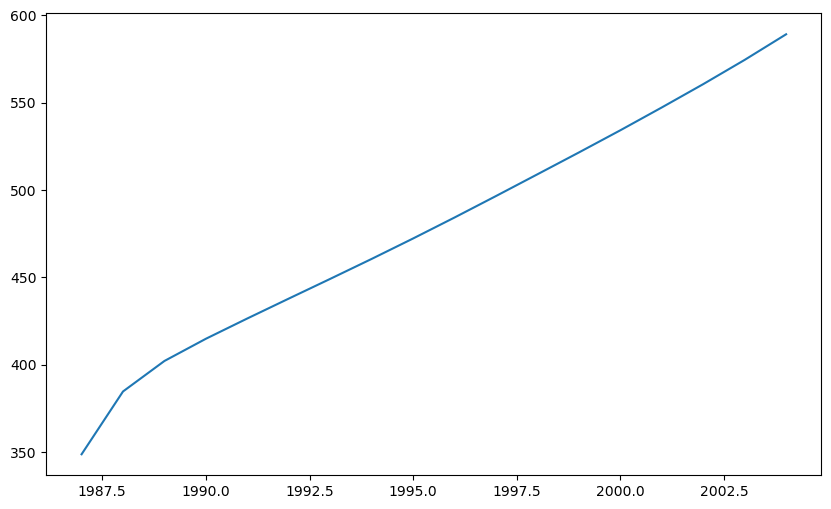

In [40]:
# 设置年份为索引
N1_data.set_index('year', inplace=True)
N2_data.set_index('year', inplace=True)
gamma_data.set_index('Year', inplace=True)

# 获取初始条件
N1_0 = N1_data.loc[1987, 'mean']
N2_0 = N2_data.loc[1987, 'mean'] 
def buffer_factor(z):
    return 3.69 + 1.86e-2 * z - 1.80e-6 * z**2


def gamma_func(t):
    idx = np.argmin(np.abs(gamma_data.index - t))
    return gamma_data.iloc[idx]['Total'] / 1000*2.13
    
# 微分方程模型
def model(Y, t, k12, k21, N2_0):
    N1, N2 = Y
    xi = buffer_factor(N1)  # 计算缓冲因子
    gamma_t = gamma_func(t)  # 获取当前时间点的gamma值
    dN1dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma_t
    dN2dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0))
    return [dN1dt, dN2dt]

# 参数
k12 = 105 / 740
k21 = 102 / 900
N2_0 = 821
# 时间序列
t = np.linspace(1987, 2004, 18)

# 求解微分方程
solution = odeint(model, [N1_0, N2_0], t, args=(k12, k21, N2_0))
# 提取结果
N1_sim, N2_sim = solution.T

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, N1_sim, label='Simulated Atmospheric CO2')



In [87]:
import pandas as pd
N2= pd.read_csv('co2_annmean_mlo.csv',sep=',', skiprows=43)
print(N2.head(50))
N2_data= N2[['year', 'mean']]
N1 = pd.read_csv('co2_annmean_gl.csv',sep=',', skiprows=37)
print(N1.head(60))
N1_data =N1[['year', 'mean']]
#在尝试后面操作发现读取index出现问题我们跳过前面33行无效信息
gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)
print(gamma.head(30))
gamma_data = gamma[['Year', 'Total']]

    year    mean   unc
0   1959  315.98  0.12
1   1960  316.91  0.12
2   1961  317.64  0.12
3   1962  318.45  0.12
4   1963  318.99  0.12
5   1964  319.62  0.12
6   1965  320.04  0.12
7   1966  321.37  0.12
8   1967  322.18  0.12
9   1968  323.05  0.12
10  1969  324.62  0.12
11  1970  325.68  0.12
12  1971  326.32  0.12
13  1972  327.46  0.12
14  1973  329.68  0.12
15  1974  330.19  0.12
16  1975  331.13  0.12
17  1976  332.03  0.12
18  1977  333.84  0.12
19  1978  335.41  0.12
20  1979  336.84  0.12
21  1980  338.76  0.12
22  1981  340.12  0.12
23  1982  341.48  0.12
24  1983  343.15  0.12
25  1984  344.87  0.12
26  1985  346.35  0.12
27  1986  347.61  0.12
28  1987  349.31  0.12
29  1988  351.69  0.12
30  1989  353.20  0.12
31  1990  354.45  0.12
32  1991  355.70  0.12
33  1992  356.54  0.12
34  1993  357.21  0.12
35  1994  358.96  0.12
36  1995  360.97  0.12
37  1996  362.74  0.12
38  1997  363.88  0.12
39  1998  366.84  0.12
40  1999  368.54  0.12
41  2000  369.71  0.12
42  2001  3

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\胡天龙\AppData\Local\Temp\ipykernel_14008\1218715712.py:9: SyntaxWarning: invalid escape sequence '\s'
  gamma = pd.read_csv('global.1751_2014.ems', sep='\s+', skiprows=33)


Time: 1987.0, N1: 348.68, N2: 821.0, gamma: 12.194249999999998, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1988.0, N1: 384.6568016210933, N2: 797.4421648715127, gamma: 12.64368, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1989.0, N1: 402.1300034217486, N2: 792.7510853955254, gamma: 12.92058, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1990.0, N1: 414.84359313975864, N2: 792.9665880822076, gamma: 12.937619999999999, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1991.0, N1: 426.46808861041563, N2: 794.3521309044739, gamma: 13.08246, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1992.0, N1: 437.84962125700434, N2: 795.9849010772458, gamma: 12.94614, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1993.0, N1: 449.14522160060864, N2: 797.6269187207448, gamma: 12.9291, k12: 0.14189189189189189, k21: 0.11333333333333333
Time: 1994.0, N1: 460.57656227352925, N2: 799.2354242553403, gamma: 13.15062, k12: 0.14189189189189189, 

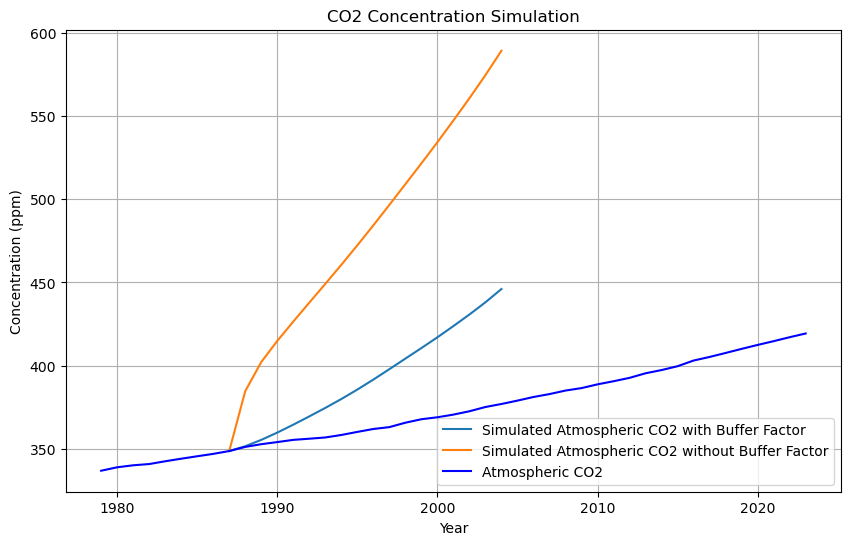

In [89]:
N1_data.set_index('year', inplace=True)
N2_data.set_index('year', inplace=True)
gamma_data.set_index('Year', inplace=True)

# 获取初始条件
N1_0 = N1_data.loc[1987, 'mean']
N2_0 = N2_data.loc[1987, 'mean'] 

# 定义微分方程模型
def model(Y, t, k12, k21, gamma_func):
    N1, N2 = Y
    gamma_t = gamma_func(t)
    dN1dt = -k12 * N1 + k21 * N2 + gamma_t
    dN2dt = k12 * N1 - k21 * N2
    return [dN1dt, dN2dt]

# 参数
k12 = 105 / 740
k21 = 102 / 900

# 时间序列
t = np.linspace(1987, 2004, 18)

# 定义一个函数来获取gamma值
def gamma_func(t):
    idx = np.argmin(np.abs(gamma_data.index - t))
    return gamma_data.iloc[idx]['Total'] / 1000*2.13

# 求解微分方程
solution1 = odeint(model, [N1_0, N2_0], t, args=(k12, k21, gamma_func))

# 输出求解过程中的数值
for i, (time, state) in enumerate(zip(t, solution)):
    gamma_t = gamma_func(time)
    print(f"Time: {time}, N1: {state[0]}, N2: {state[1]}, gamma: {gamma_t}, k12: {k12}, k21: {k21}")

# 提取结果
N1, N2 = solution1.T

N1_0 = N1_data.loc[1987, 'mean']
N2_0 = N2_data.loc[1987, 'mean'] 
def buffer_factor(z):
    return 3.69 + 1.86e-2 * z - 1.80e-6 * z**2


def gamma_func(t):
    idx = np.argmin(np.abs(gamma_data.index - t))
    return gamma_data.iloc[idx]['Total'] / 1000*2.13
    
# 微分方程模型
def model(Y, t, k12, k21, N2_0):
    N1, N2 = Y
    xi = buffer_factor(N1)  # 计算缓冲因子
    gamma_t = gamma_func(t)  # 获取当前时间点的gamma值
    dN1dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma_t
    dN2dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0))
    return [dN1dt, dN2dt]

# 参数
k12 = 105 / 740
k21 = 102 / 900
N2_0 = 821
# 时间序列
t = np.linspace(1987, 2004, 18)

# 求解微分方程
solution2 = odeint(model, [N1_0, N2_0], t, args=(k12, k21, N2_0))
# 提取结果
N1_sim, N2_sim = solution2.T

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, N1, label='Simulated Atmospheric CO2 with Buffer Factor')
plt.plot(t, N1_sim, label='Simulated Atmospheric CO2 without Buffer Factor')
plt.plot(N1_data.index, N1_data['mean'], label='Atmospheric CO2', color='blue')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.title('CO2 Concentration Simulation')
plt.legend()
plt.grid(True)
plt.show()